<a href="https://colab.research.google.com/github/FcoFraguas1987/DS_ML_Portfolio/blob/DS_ML_Bioinformatics/Aprendizaje_supervisado_metodos_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÓDULO 5

## Clasificación Logísitica

### 1. Introducción
Se va a trabajar los métodos de clasificación más simples que se conocen, los de tipos "caja blanca" ya que, aparte de ser rápidos y fáciles de ejecutar, nos proporcionana un visiuón comprensible de los datos del problema. Estos modelos de clasificación son:

* Regresiones linial y logísitica
* k vecinos más cercanos
* Árboles de decisión

#### Datos del estudio
Se vana a trabajar con una serie de datos simplificados. Eliminaremos varias variables dejando únicamente 2. Estas dos variables se obtiene por un ánalisis de Componentes Principales a fin de apreciar mejor los valores forntera dentro de la clasificación aplicando los métodos de trabajo del presente cuaderno.

In [ ]:
import pandas as pd

#Cargamos los datos ómicos de la matriz de expresión
gene_exp_inmune = pd.read_csv('https://drive.google.com/uc?id=1PYzEIdmnfjOnBpPDIFBE9hL1Lkj_OBCk',index_col=0)
#Cargamos la variable clínica correspondiente a las etiquetas "inmune" vs. "MITF-low"
clinical_info_inmune = pd.read_csv('https://drive.google.com/uc?id=1hHQfcvrFa5Jds-9tW_X4sHjKpYKdii9s',index_col=0)

X, y = gene_exp_inmune, clinical_info_inmune

#Imprimimos las 5 primeras muestras del conjunto de datos para comprobar que se ha cargado correctamente
X.head()

,COL2A1,RXRG,CCL19,SSX1,CST2,PRSS33,CDH2,SCUBE2,TMPRSS13,TRPM8,...,UBASH3A,GBP4,PRF1,PTK6,PCDHB2,GSDMA,DIO2,PLIN1,NCF1C,SLC7A11
0,-1.431141,-7.845756,0.665118,-1.409304,-2.537396,-1.676281,1.529957,-0.895042,-0.298778,5.091742,...,-0.659997,-1.469602,-0.570793,1.047635,-2.068966,-0.202828,-0.506767,1.285256,-0.901222,2.483020
1,-0.424374,-8.352423,0.386055,-2.846138,-0.685105,0.339787,-3.488043,-0.584982,5.679815,-1.117879,...,0.190202,-0.282190,0.375094,0.261662,3.356282,2.028145,-2.399010,-1.152801,0.662490,-2.914991
2,11.014251,0.415549,-1.633781,0.315442,-0.662332,-0.498761,0.535811,-0.467456,-2.818738,1.731049,...,-0.816305,-0.316202,-1.153745,-2.284201,-1.761597,-0.746975,-2.988195,-1.976877,-1.400889,-2.266779
3,-1.180446,-8.187415,-1.958023,5.061146,-2.603744,-0.666706,0.456460,-4.609624,-1.713164,-3.880876,...,0.214344,-0.327110,0.476764,1.153275,-0.337649,-1.006765,-2.686648,-1.329148,0.055994,-2.652313
4,0.816312,-1.189303,4.837235,4.972176,-2.963715,-2.665721,-0.268042,-1.740607,0.011610,-4.107467,...,3.352734,2.145368,3.358865,-2.324389,-1.741669,0.734312,-1.649316,6.284688,1.450729,1.131275


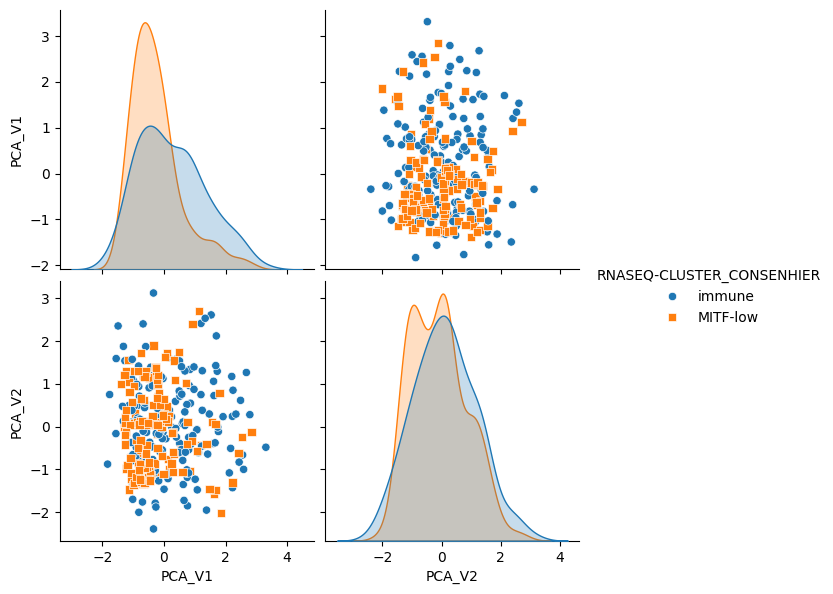

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Transformamos el conjunto de datos inicial a datos representado por sólo 2 variables
n_componentes = 2
pca = PCA(n_components=n_componentes)
X_2D = pca.fit_transform(X)

#Pasamos a valores [0, 1] cada una de las variables
st = StandardScaler()
X_2D = st.fit_transform(X_2D)

#Transformamos el conjunto resultando a una estructura data_frame
df = pd.DataFrame(X_2D, columns = ['PCA_V1','PCA_V2'])
df = df.join(y)

#Representamos en un gráfico de dispersión los nuevos datos de 2D con sus funciones de densidad
sns.pairplot(df, hue='RNASEQ-CLUSTER_CONSENHIER', markers=["o", "s"], height=3);

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

y_int = pd.get_dummies(y).iloc[:,0]
X_2D_train, X_2D_test, y_2D_train, y_2D_test = train_test_split(X_2D, y_int, random_state=42)

print("Numero de instancias en entrenamiento: {}; y test: {}".format(len(X_train),len(X_test)))

Numero de instancias en entrenamiento: 252; y test: 84


### 2. Clasificación por métodos de Regresión
Estos métodos termianan generando un algoritomo que, represnetado en un gráfico, limita los valores de salida en n-tipos.

En el caso de trabajo de este cuaderno, tenemos 2 variables por PCA, así que el algoritmo es una recta.

---------------------------------------------------------------------
#### Regresión Lineal
El proceso de Regresión Lineal logística es similar en problemas de clasificación que en problemas de regresión. El método buscará un modelo cuyos coeficientes son ajustado por mínimos cuadrados, simplemnete los valores de salida de este modelo son 0 y 1.

El algoritmo es una frontera de decisión, y clasificará las nuevas instancias en función de su posición con respecto a dicha frontera.

In [ ]:
from sklearn import linear_model

lm = linear_model.LinearRegression()

#Se transforma la salida categórica a valores {0,1} para poder aplicar la regresión lineal
y_train_int = pd.get_dummies(y_train).iloc[:,0]

lm.fit(X_train, y_train_int)
print(lm.intercept_)
lm.coef_ #los valores de los coeficinetes son proporcionales a su importancia en el problema

0.3371977981689106


array([ 0.00062339, -0.01640629,  0.05765623, -0.00365438, -0.03219924,
        0.02831667,  0.02246995,  0.02406873,  0.04154468,  0.0113776 ,
        0.03335884,  0.02299525, -0.00375194,  0.04292671,  0.01228339,
       -0.01640771,  0.03062444, -0.00302422, -0.02929467,  0.00676286,
       -0.01947947, -0.02999738,  0.02491126, -0.0079843 , -0.00937148,
        0.00456585,  0.00615687, -0.01706812, -0.0042064 , -0.03262455,
       -0.03213231,  0.00450434, -0.05782194, -0.02456257,  0.0250594 ,
       -0.00637356,  0.04990764, -0.00675726, -0.04263797, -0.07777568,
        0.03133627,  0.01415696, -0.07683601, -0.08607171, -0.01192452,
        0.02302473,  0.06651956, -0.01050754,  0.04608665, -0.00776793])

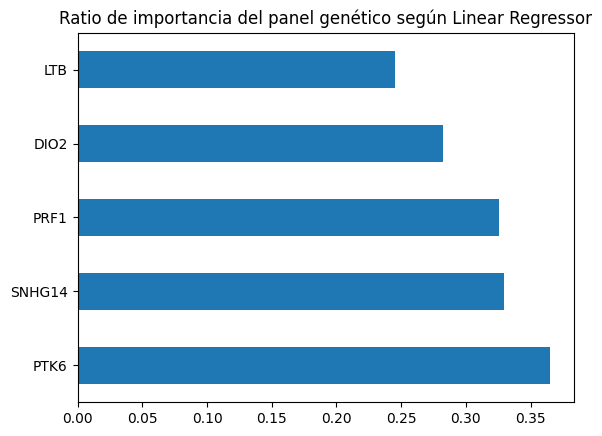

In [ ]:
import numpy as np
from sklearn.preprocessing import normalize

#Transformamos el resultado anterior a una lista uni-dimensional
importancia = np.abs(lm.coef_)
#Normalizamos los valores:
importancia_norm = normalize(importancia[:,np.newaxis], axis=0).ravel()

#Se representan las 5 más importantes según valor absoluto
(pd.Series(importancia_norm, index=X_train.columns).nlargest(5).plot(kind='barh'))
plt.title("Ratio de importancia del panel genético según Linear Regressor")
plt.show()

Para poder explorar la calidad del modelo utilizaremos la variable de *accuracy*.

Como el modelo nos proporcina resultados en un conjunto de valores entre 0 y 1, siendo esto un problema de clasificación, ajustaremos esos resultados a los valores 0 y 1 por redondeo.

In [ ]:
from sklearn.metrics import accuracy_score

#Transformamos la salida del conjunto de entrenamiento a un valor {0,1}
y_test_int = pd.get_dummies(y_test).iloc[:,0]
y_pred = lm.predict(X_test)

print("Valores de predicción originales (10 primeros):")
print(y_pred[:10])
print()

print("Valores de predicción redondeados (10 primeros):")

y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0

print(y_pred[:10])
print()

acc_score = accuracy_score(y_test_int, y_pred)
print("Accuracy obtenido:",acc_score)

Valores de predicción originales (10 primeros):
[ 1.29485689 -0.09064197  1.20110728  1.05823504  0.32454412  1.00993704
  0.65879706  0.6314562   0.2538342   0.45818503]

Valores de predicción redondeados (10 primeros):
[1. 0. 1. 1. 0. 1. 1. 1. 0. 0.]

Accuracy obtenido: 0.7142857142857143


#### Regresión Logísitica
Los métodos de regresión logísitica crean un valor frotnera entre los datos más suave que la regresión linal, y es una función orientada a problemas de clasificación más que de regresión.

Su ecuación es:

\begin{equation}
\hat{y}(w,x) = \frac{1}{1+e^{ w_0 + w_1 \cdot x_1 + \ldots + w_n \cdot x_n}}
\end{equation}

Este método de clasificación trabaja de una forma similar al anterior. Hay que tener en cuenta que este método ya nos proporciona la salida en los mismos valores discretos que el problema.

Coef. independiente: [2.60557275]
Coef. por variable: [[-0.03110064  0.16743501 -0.58385565 -0.041624    0.40949269 -0.3470138
  -0.25777581 -0.28951875 -0.41787594 -0.31815611 -0.42031786 -0.21280413
   0.12050644 -0.59472177 -0.05220371  0.14025638 -0.54429615 -0.0470958
   0.30750881 -0.07255672  0.28527669  0.24941566 -0.3904066   0.19336178
   0.12320901  0.10120174 -0.14906486  0.37664058 -0.02005865  0.37683877
   0.33847116 -0.16205854  0.73224376  0.15976062 -0.2941222   0.07575672
  -0.24837593  0.26439539  0.54176416  0.77176051 -0.20439398 -0.34556627
   0.5973885   0.96986976  0.09615201 -0.21446275 -0.93445767  0.03523568
  -0.31621746  0.25407509]]



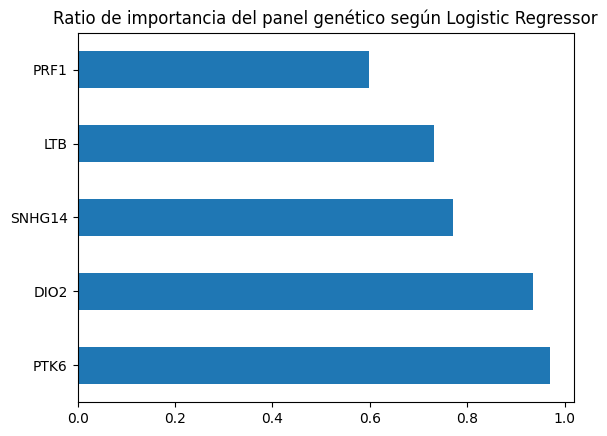


Valores de predicción originales (10 primeros):
['MITF-low' 'immune' 'MITF-low' 'MITF-low' 'immune' 'MITF-low' 'MITF-low'
 'MITF-low' 'immune' 'immune']

Acierto de Logistic Regression en la partición de test: 0.7380952380952381


In [ ]:
import warnings
warnings.filterwarnings("ignore")

lrm = linear_model.LogisticRegression()

#buscamos determinar las variables más importantes para el modelo a la hora de realizar su clasificación
lrm.fit(X_train, y_train.to_numpy().ravel())
print("Coef. independiente:",lrm.intercept_)
print("Coef. por variable:",lrm.coef_)
print()

#transformamos a una lista uni-dimensional y la normalizamos posteriormente
importancia = np.abs(lrm.coef_[0])
importancia_norm = normalize(importancia[:,np.newaxis], axis=0).ravel()

#Se representan las 5 más importantes según valor absoluto
(pd.Series(importancia, index=X_train.columns).nlargest(5).plot(kind='barh'))
plt.title("Ratio de importancia del panel genético según Logistic Regressor")
plt.show()
print()

#Determinamos la calidad del modelo
y_pred = lrm.predict(X_test)

print("Valores de predicción originales (10 primeros):")
print(y_pred[:10])
print()

acc_score = accuracy_score(y_test, y_pred)
print("Acierto de Logistic Regression en la partición de test:", acc_score)

Aparte del criterio de *accuracy* tenemos otros valores que nos permiten determinar la bondad del modelo. Utilizaremos matrices de confución y valores de F1 que comprende también los aciertos en la otra clase .

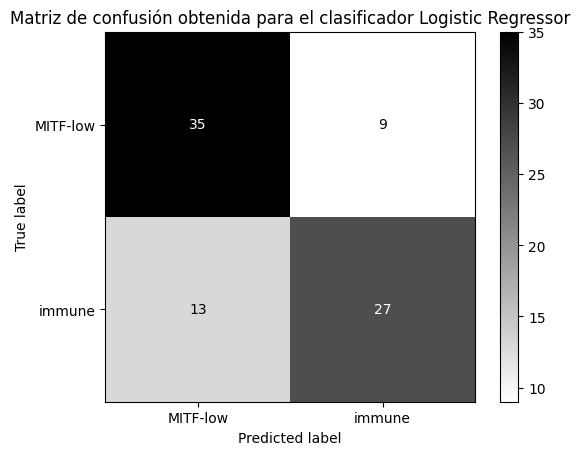

              precision    recall  f1-score   support

    MITF-low       0.73      0.80      0.76        44
      immune       0.75      0.68      0.71        40

    accuracy                           0.74        84
   macro avg       0.74      0.74      0.74        84
weighted avg       0.74      0.74      0.74        84

La medida F1 para el clasificador LogisticRegression es 0.7105
La medida AUC para el clasificador LogisticRegression es 0.7642


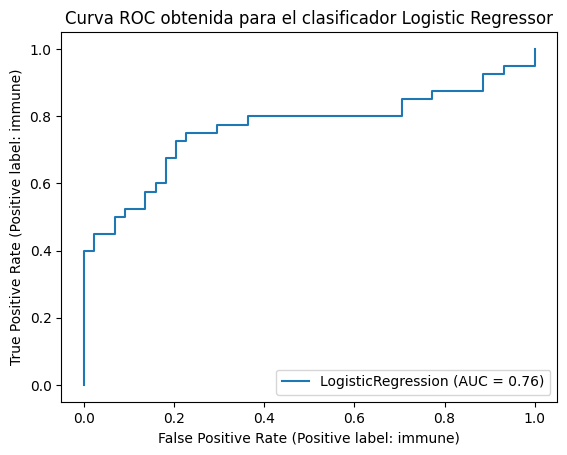

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

metrics.ConfusionMatrixDisplay.from_estimator(lrm, X_test, y_test,cmap='binary')
plt.title("Matriz de confusión obtenida para el clasificador Logistic Regressor")
plt.show()

print(metrics.classification_report(y_test,y_pred))

f1 = metrics.f1_score(y_test,y_pred,pos_label="immune")
print("La medida F1 para el clasificador %s es %.4f"%(lrm.__class__.__name__,f1))

y_probs = lrm.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print("La medida AUC para el clasificador %s es %.4f"%(lrm.__class__.__name__,auc))
metrics.RocCurveDisplay.from_estimator(lrm, X_test, y_test)
plt.title("Curva ROC obtenida para el clasificador Logistic Regressor")
plt.show()

Estos datos nos indican que el modelo tiene más precisión el clasificar los valores de salida *MITF-Flow*. El valor de F1 es inferior al de *accuracy* y similar al valor de AUC.

Otra forma de poder apreciar el ajuste del modelo al problema es mediante la representación gráfica de valores forntera.

<Figure size 1200x900 with 0 Axes>

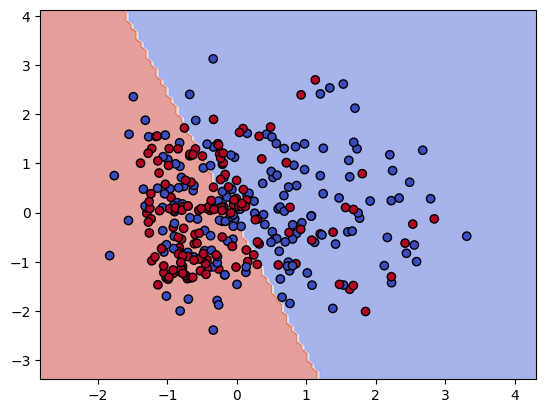

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

clf = linear_model.LogisticRegression()
clf.fit(X_2D_train, y_2D_train) #se realiza el entrenamiento con los modelos de 2 dimensiones

fig = plt.figure(figsize=(12,9))
# Representamos la frontera de decisión
disp = DecisionBoundaryDisplay.from_estimator(clf, X_2D,
                                              response_method="predict",
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

# Proyectamos encima los puntos del conjunto de datos
disp.ax_.scatter(X_2D[:, 0], X_2D[:, 1],
                 c=y_int, edgecolor="k",
                 cmap=plt.cm.coolwarm)
plt.show()

#### 2.1 Ventajas e inconvenientes de los modelos lineales
Los modelos lineales son muy eficientes en su uso, resultan apropiados para una aproximación inicial al problema. Además son altamanete interpretables, pudiendo mostrar las cariables de mñas peso para la clasificación.

La precisión de estos modelos se ve favorecidad porque interpretan de forma independiente las variables de entrada, pero en problemas muy complejos con variables de entrada correlacionadas, los valores de salira presentan una elevada variabilidad.

### 3. Método de clasificación por k-vecinos más cercanos

Este método se clasifica dentro de los métodos perezosos, ya que no contienen ningún aprendizaje en si. El método utiliza los datos de entrenamiento como unos valores de referencia almacenados. Al llega una nueva medida el método comprar esa instancia con las que él tiene almacenadas, por lo que la clasificación se produce en base a instancias.

El cirterio de clasificación es la similitud. Puesto que se trata de un problmea numérico la similitud es inversamente proporcional a la distancia (menor distancia más parecido) y para este tipo de datos se usa la distancia **euclídea** normalmente.

Otro parámetro importante para la labor de predicción el la determinación del número k. Este número conviene que no sea par, ya que daría lugar a problemas de empate y no resolución de la clasificación. Y sus valores deben ser lo sufcientemente altos que limiten el ruido y no tan elevados que generen un efecto de *overfitting*.

------------------------------------

Al aplicar el método:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # cargamos la función desde la biblioteca

#Ejemplo de uso de kNN
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean') # instanciamos el modelo
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)#generamos valores predichos

acc_score = accuracy_score(y_test, y_pred)
print("Acierto de KNN en la partición de test:", acc_score)#evaluamos la exactitud

Acierto de KNN en la partición de test: 0.6785714285714286


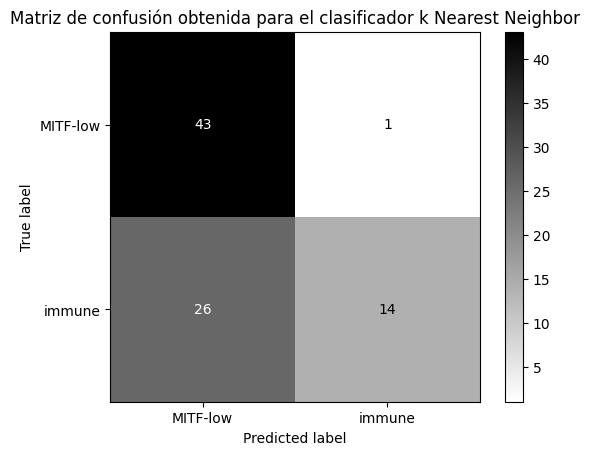

              precision    recall  f1-score   support

    MITF-low       0.62      0.98      0.76        44
      immune       0.93      0.35      0.51        40

    accuracy                           0.68        84
   macro avg       0.78      0.66      0.64        84
weighted avg       0.77      0.68      0.64        84

La medida F1 para el clasificador KNeighborsClassifier es 0.5091
La medida AUC para el clasificador KNeighborsClassifier es 0.7750


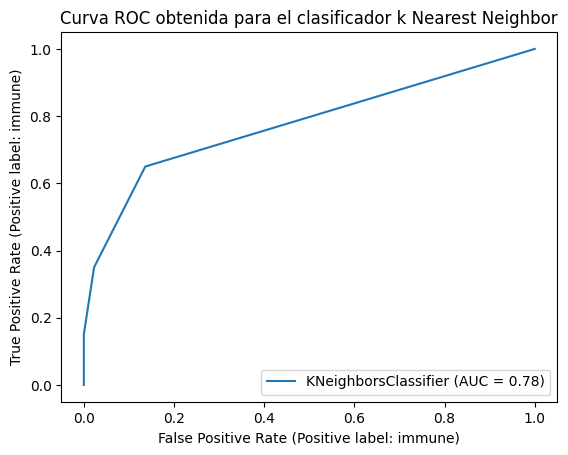

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test,cmap='binary')
plt.title("Matriz de confusión obtenida para el clasificador k Nearest Neighbor")
plt.show()

print(metrics.classification_report(y_test,y_pred))

f1 = metrics.f1_score(y_test,y_pred,pos_label="immune")
print("La medida F1 para el clasificador %s es %.4f"%(knn.__class__.__name__,f1))

y_probs = knn.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print("La medida AUC para el clasificador %s es %.4f"%(knn.__class__.__name__,auc))
metrics.RocCurveDisplay.from_estimator(knn, X_test, y_test)
plt.title("Curva ROC obtenida para el clasificador k Nearest Neighbor")
plt.show()

<Figure size 1200x900 with 0 Axes>

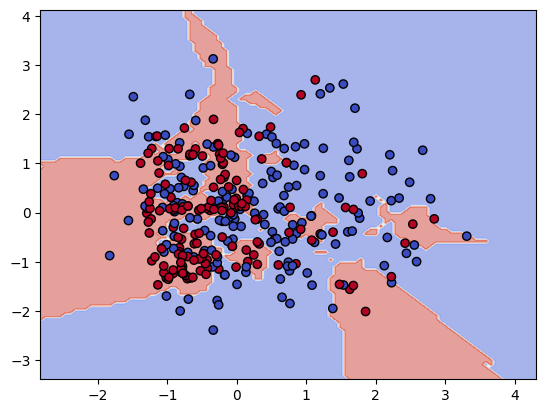

In [ ]:
#Creamos y entrenamos el clasificador con los datos 2D
clf = KNeighborsClassifier()
clf.fit(X_2D_train, y_2D_train)
score = clf.score(X_2D_test,y_2D_test)

fig = plt.figure(figsize=(12,9))
# Representamos la frontera de decisión
disp = DecisionBoundaryDisplay.from_estimator(clf, X_2D,
                                              response_method="predict",
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

# Proyectamos encima los puntos del conjunto de datos
disp.ax_.scatter(X_2D[:, 0], X_2D[:, 1],
                 c=y_int, edgecolor="k",
                 cmap=plt.cm.coolwarm)
plt.show()

La gráfica del algoritmo presenta un aspecto muy diferente al de una recta. Aparecen zonas con formas más o menos abiertas que contienen datos. Este tipo de formas suele ser normal en funciones discriminantes no lineales.

### **3.1 Ventajas e inconvenientes del algoritmo kNN**

El método de k-vecinos más cercanos funciona bien incluso con instancias ruidosas (aunque haya datos anómalos éstos no deberían afectar a la salida del clasificador) ya que se compensaría con el resto de datos que sí son correctos.

Se trata de un modelo bastante eficaz, usa funciones lineales para aproximarse a la función objetivo, además es versatil y utilizable en regresión y clasificación. Su uso es sencillo y recomendado con prototipos del problema.

Hay una serie de problemas que se tiene que tener en cuenta. Estos problemas derivand e los datos. Si existe una alta dimensionalidad el valor de distancia converge hacia un mismo valor, y si las variables seleccionadas son irrelevantes el modelo deja de hacer buenas predicciones. Además hace un uso ineficiente de memoria (ya que debe guardar todas las instancias de entrenamiento) y es de una elevada complejidad computacional.

## 4. Árboles de decisión

Son un modelo que permite su uso en problemas de regresión y clasificación.

Este modelo consta de una serie de agrupaciones de datos de forma jerarquizada. De tal modod que se toma un grupo de los mismos y ante un criterio de decisión se clasifican en dos ssubconjuntos de datos. Este proceso se ejecuta jerarquicamente hasta alcanzar un subconjunto completamente homogeneo o un límite de criterios de decisión establecido por el ususario. La forma de representar este modelo recuerda a un arbol, por lo que sus elementos se denominan:

- Cada hoja es una clase.
- Cada nodo es un cirerio de decisión o regla.
- Los descendientes de cada nodo son los resultados de la prueba del nodo.

Durante el aprendizaje, se busca que cada nodo realice una división sobre el número de instancias de cada clase. El criterio de división se calcula mediante dos posibles medidas:
* la ganancia de información (*entropía*)
* la impureza (*índice Gini*).

El método busca aquella decisión (variable y valor) que minimice la impureza y aumente la ganancia de información. Clasificando los datos resultantes en dos grupos:

* SI
* SINO

Como el proceso se realiza de forma recursiva aparece en la parte superior aquellas variables más importantes para el problema. Además, como ocurre en otro tipo de modelos, un mayor número de nodos proporciona un modelo más ajustado al problema. En este modelo también se busca un equilibrio entre el *underfitting* y el *overfitting* ya que generar un modelo demasiado complejo, con muchos nodos, puede terminar generando probelmas de sobreaprendizaje.

In [ ]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train) #se realiza el entreamiento del modelo a partir d elos datos

y_pred = dt.predict(X_test)# se obtiene una predicción de los valores del mismo

acc_score = accuracy_score(y_test, y_pred)
print("Acierto de DT en la partición de test:", acc_score) # se evalua con el criterio de accuracy

Acierto de DT en la partición de test: 0.6785714285714286


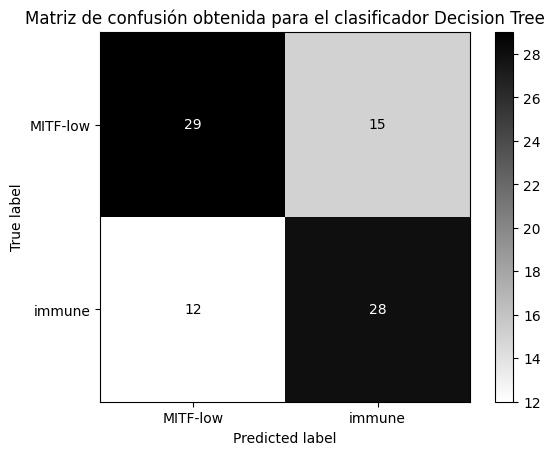

              precision    recall  f1-score   support

    MITF-low       0.71      0.66      0.68        44
      immune       0.65      0.70      0.67        40

    accuracy                           0.68        84
   macro avg       0.68      0.68      0.68        84
weighted avg       0.68      0.68      0.68        84

La medida F1 para el clasificador DecisionTreeClassifier es 0.6747
La medida AUC para el clasificador DecisionTreeClassifier es 0.6795


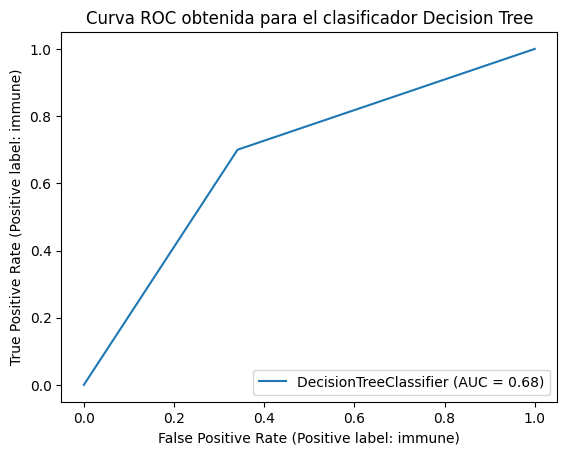

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test,cmap='binary')
plt.title("Matriz de confusión obtenida para el clasificador Decision Tree")
plt.show()

print(metrics.classification_report(y_test,y_pred))

f1 = metrics.f1_score(y_test,y_pred,pos_label='immune')
print("La medida F1 para el clasificador %s es %.4f"%(dt.__class__.__name__,f1))

y_probs = dt.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print("La medida AUC para el clasificador %s es %.4f"%(dt.__class__.__name__,auc))
metrics.RocCurveDisplay.from_estimator(dt, X_test, y_test)
plt.title("Curva ROC obtenida para el clasificador Decision Tree")
plt.show()

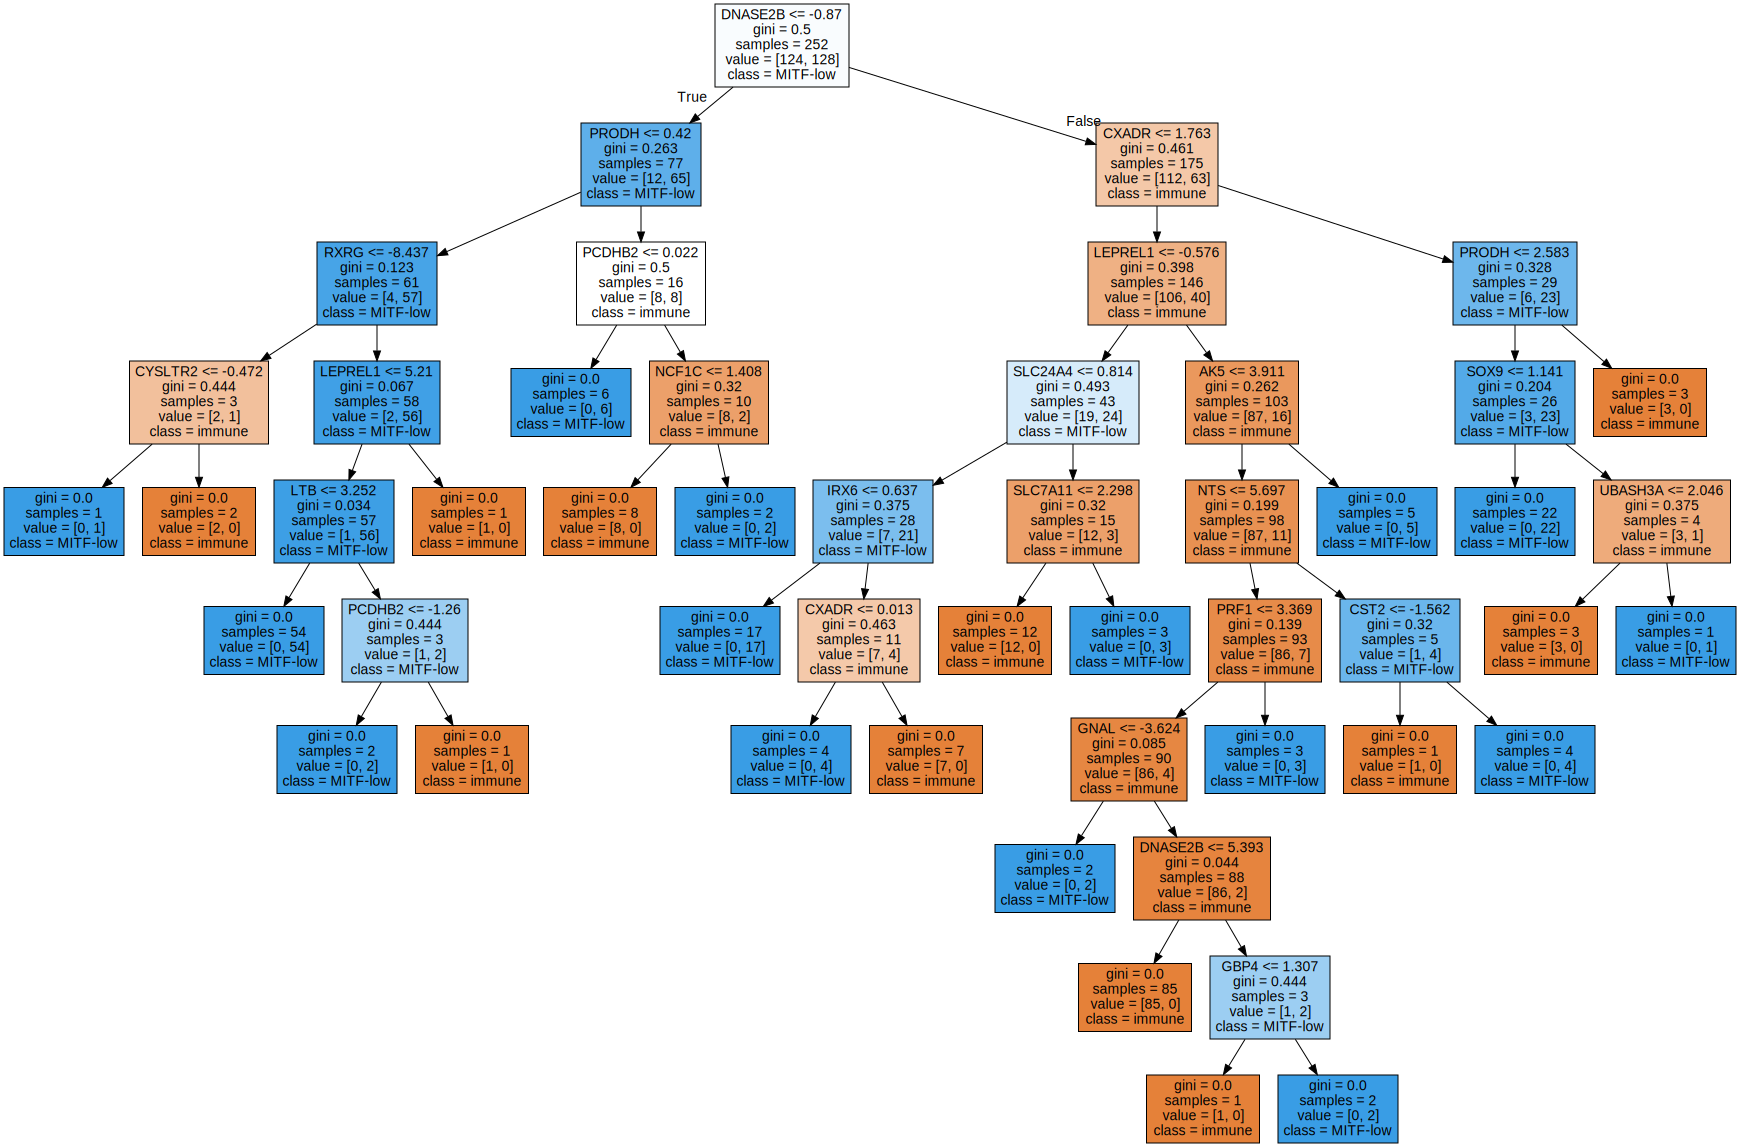

In [ ]:
#Bibliotecas necesarias para una mejor visualización
from graphviz import Source

#se pinta el árbol:
tree_graph = tree.export_graphviz(dt, out_file=None,
                                  feature_names=X.columns,
                                  class_names=pd.unique(y[y.columns[0]]),
                                  filled = True)
graph = Source(tree_graph)
graph

Como s eha comentado, las variables más importantes para clasificar los datos del problema aparecen más cerca de la raiz. El método nos proporciona funcciones para poder acceder a dichas variables:

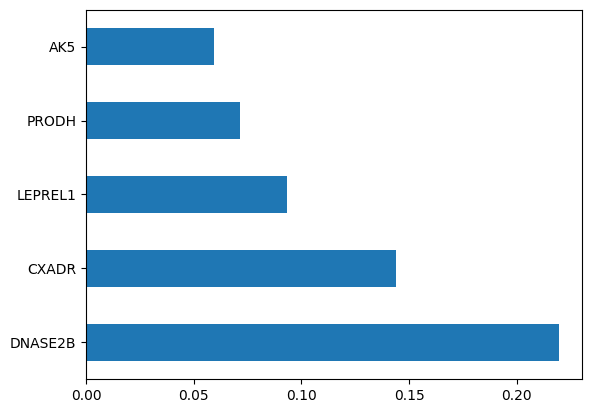

In [ ]:
#Captura de los valores del ranking de importancia
importancia = dt.feature_importances_
#Se representan las 5 más importantes
(pd.Series(importancia, index=X_train.columns).nlargest(5).plot(kind='barh'))
plt.show()

<Figure size 1200x900 with 0 Axes>

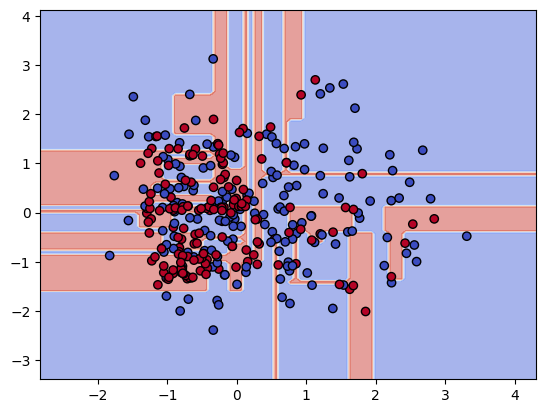

In [ ]:
#Creamos y entrenamos el clasificador con los datos 2D
clf = tree.DecisionTreeClassifier()
clf.fit(X_2D_train, y_2D_train)
score = clf.score(X_2D_test,y_2D_test)

fig = plt.figure(figsize=(12,9))
# Representamos la frontera de decisión
disp = DecisionBoundaryDisplay.from_estimator(clf, X_2D,
                                              response_method="predict",
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

# Proyectamos encima los puntos del conjunto de datos
disp.ax_.scatter(X_2D[:, 0], X_2D[:, 1],
                 c=y_int, edgecolor="k",
                 cmap=plt.cm.coolwarm)
plt.show()

En esta gráfica la frontera de decisión tiene forma rectangular y ramificada, de algunos rectángulos salen sub-rectángulos. Esta forma es qla misma que tiene el arbol.

#### 4.1 Ventajas e inconvenientes de los árboles de decisión
Los árboles de decisión son una de las herramientas más potentes utilizadas en Machine Learning.
Estos modelos son fáciles de usar y eficientes, generando criterios de decisión interpretables por el usuario, el cual puede alterar los criterios de trabajo para hacer que el modelo se adapte mejor al problema.Escalan muy bien las vvariables y la computación de las mismas es eficiente.

En principio no trabajan con variables continuas, por lo que hay una discretización de las mismas. Esto lo debe tener en cuenta el usuario.
El tipo de división (o forntera) que realizan es rectangular, por lo que hay que vigilar que los datos s eajusten a este tipo de criterio de decisión.Trabajan muy mal con valores perdidos, por lo que se hace necesario implementar otros valores a lso datos. Este modelo no detecta correla
Fácil de usar y eficiente. No contiene un excesivo número de parámetros, y éstos son sencillos de entender y configurar, para adaptarse mejor al problema. Además, es muy rápido en su ejecución, por lo que permite realizar continuas pruebas.
Las reglas generadas son fáciles de interpretar. Se ha comentado que una de las principales virtudes de los árboles de decisión es que son sistemas comprensibles por el usuario, puesto que utilizan reglas de cognición similares a las que aplicaría el experto.
Escalan mejor que otro tipo de técnicas. Si aumentamos el número de instancias o de variables, el rendimiento en tiempo de cómputo no se verá excesivamente afectado.
Puede manejar posibles datos ruidosos. Para ello, utiliza un mecanismo interno conocido como "poda" que permite reducir la profundidad del árbol de manera heurística en aras de una mejor generalización.
El número de aspectos positivos de los árboles de decisión es bastante amplio; sin embargo, se deben tener en cuenta algunos detalles que pueden afectar a su uso:

No maneja directamente las variables de entrada de tipo numérico. Para el cálculo de las funciones de entropía o gini, las variables se deben discretizar previamente. Esto es transparente al usuario, pero debe ser tenido en cuenta.
Intenta dividir el dominio de la variable en regiones rectangulares. Este tipo de frontera de decisión puede no ser adecuada en algunas distribuciones de salida que sean lineales.
Tienen dificultades para lidiar con los valores perdidos. Se hace necesario imputar previamente estos valores.
Puede tener problemas de sobreaprendizaje. Si se aplica un factor muy alto de profundidad, será más dificil que generalice correctamente sobre las instancias de test.
No se detectan correlaciones entre las variables. Cada nodo de decisión se obtiene de forma independiente, sin tener en cuenta al resto.